<a href="https://colab.research.google.com/github/cml241/machine-learning-and-physics-projects/blob/main/Datos_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Taller6_Simulacion_Computacional/car.csv')


,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.isnull().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [ ]:
df.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
#Debido a la gran cantidad de variables categóricas, el análisis bivariante se hara entre la variable target (Car_Acceptability) y las demas variables
crosstab_CA_BP = pd.crosstab(index=df['Buying_Price'],columns=df['Car_Acceptability'])
crosstab_CA_BP

Car_Acceptability,acc,good,unacc,vgood
Buying_Price,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


<Axes: xlabel='Car_Acceptability', ylabel='Buying_Price'>

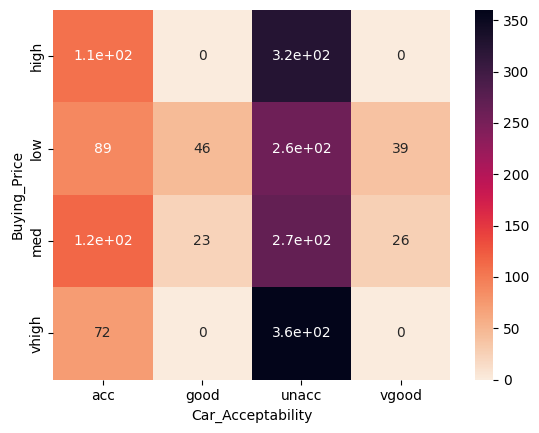

In [ ]:
sns.heatmap(crosstab_CA_BP,annot=True,cmap='rocket_r')

In [ ]:
crosstab_CA_MP = pd.crosstab(index=df['Maintenance_Price'],columns=df['Car_Acceptability'])
crosstab_CA_MP

Car_Acceptability,acc,good,unacc,vgood
Maintenance_Price,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


<Axes: xlabel='Car_Acceptability', ylabel='Maintenance_Price'>

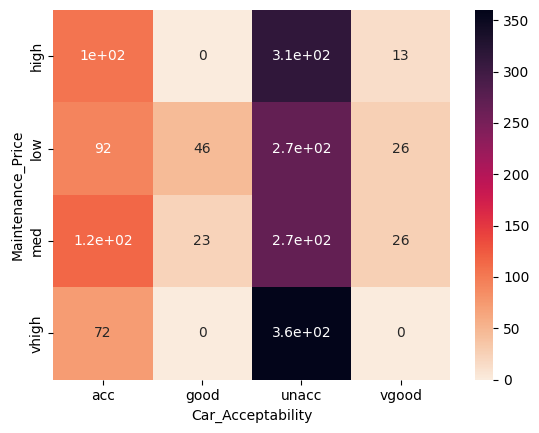

In [ ]:
sns.heatmap(crosstab_CA_MP,annot=True,cmap='rocket_r')

In [ ]:
crosstab_CA_ND = pd.crosstab(index=df['No_of_Doors'],columns=df['Car_Acceptability'])
crosstab_CA_ND

Car_Acceptability,acc,good,unacc,vgood
No_of_Doors,,,,
2,81,15,326,10
3,99,18,300,15
4,102,18,292,20
5more,102,18,292,20


<Axes: xlabel='Car_Acceptability', ylabel='No_of_Doors'>

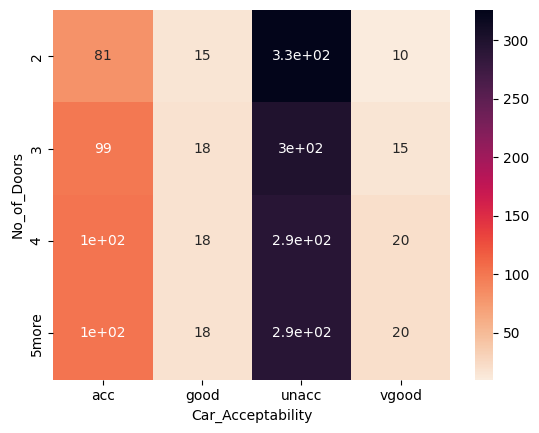

In [ ]:
sns.heatmap(crosstab_CA_ND,annot=True,cmap='rocket_r')

In [ ]:
crosstab_CA_PC = pd.crosstab(index=df['Person_Capacity'],columns=df['Car_Acceptability'])
crosstab_CA_PC

Car_Acceptability,acc,good,unacc,vgood
Person_Capacity,,,,
2,0,0,576,0
4,198,36,312,30
more,186,33,322,35


<Axes: xlabel='Car_Acceptability', ylabel='Person_Capacity'>

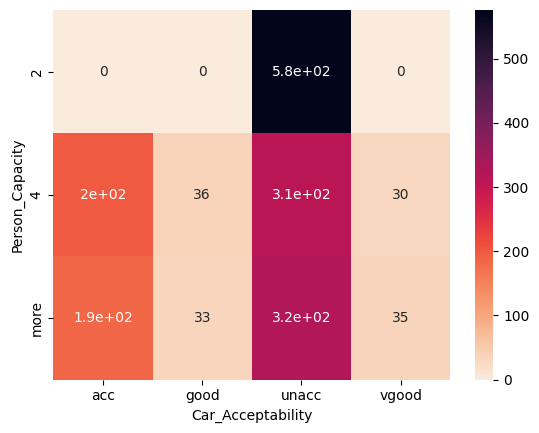

In [ ]:
sns.heatmap(crosstab_CA_PC,annot=True,cmap='rocket_r')

In [ ]:
crosstab_CA_SL = pd.crosstab(index=df['Size_of_Luggage'],columns=df['Car_Acceptability'])
crosstab_CA_SL

Car_Acceptability,acc,good,unacc,vgood
Size_of_Luggage,,,,
big,144,24,368,40
med,135,24,392,25
small,105,21,450,0


<Axes: xlabel='Car_Acceptability', ylabel='Size_of_Luggage'>

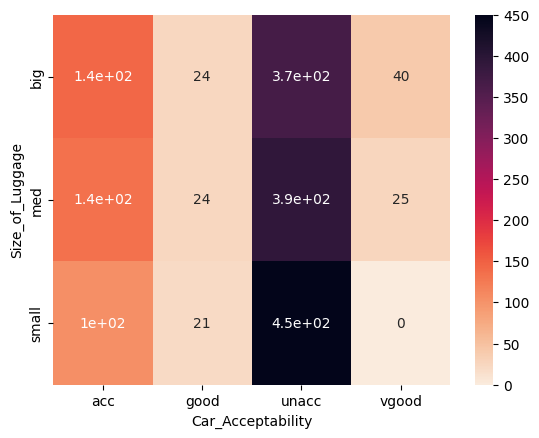

In [ ]:
sns.heatmap(crosstab_CA_SL,annot=True,cmap='rocket_r')

In [ ]:
crosstab_CA_Saf = pd.crosstab(index=df['Safety'],columns=df['Car_Acceptability'])
crosstab_CA_Saf

Car_Acceptability,acc,good,unacc,vgood
Safety,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


<Axes: xlabel='Car_Acceptability', ylabel='Safety'>

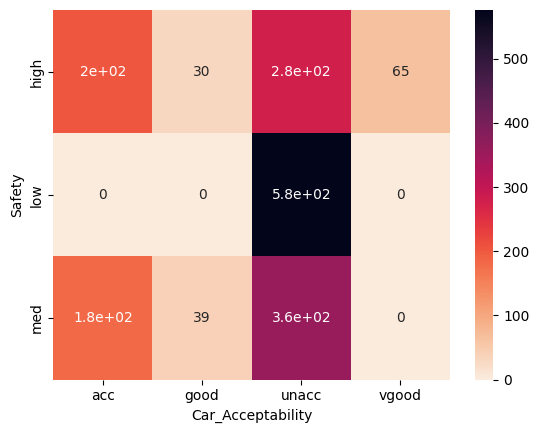

In [ ]:
sns.heatmap(crosstab_CA_Saf,annot=True,cmap='rocket_r')

In [ ]:
Buying_Price = ['low','med','high','vhigh']
ordinalenc_BP = OrdinalEncoder(categories=[Buying_Price])
ordinalenc_BP.fit(df[['Buying_Price']])
df['Buying_Price'] = ordinalenc_BP.transform(df[['Buying_Price']])
df['Buying_Price']

In [ ]:
Maintenance_Price = ['low','med','high','vhigh']
ordinalenc_MP = OrdinalEncoder(categories=[Maintenance_Price])
ordinalenc_MP.fit(df[['Maintenance_Price']])
df['Maintenance_Price'] = ordinalenc_MP.transform(df[['Maintenance_Price']])
df['Maintenance_Price']

In [ ]:
No_of_Doors = ['2','3','4','5more']
ordinalenc_ND = OrdinalEncoder(categories=[No_of_Doors])
ordinalenc_ND.fit(df[['No_of_Doors']])
df['No_of_Doors'] = ordinalenc_ND.transform(df[['No_of_Doors']])
df['No_of_Doors']

In [ ]:
Person_Capacity = ['2','4','more']
ordinalenc_PS = OrdinalEncoder(categories=[Person_Capacity])
ordinalenc_PS.fit(df[['Person_Capacity']])
df['Person_Capacity'] = ordinalenc_PS.transform(df[['Person_Capacity']])
df['Person_Capacity']

In [ ]:
Size_of_Luggage = ['small','med','big']
ordinalenc_SL = OrdinalEncoder(categories=[Size_of_Luggage])
ordinalenc_SL.fit(df[['Size_of_Luggage']])
df['Size_of_Luggage'] = ordinalenc_SL.transform(df[['Size_of_Luggage']])
df['Size_of_Luggage']

In [ ]:
Safety = ['low','med','high']
ordinalenc_Saf = OrdinalEncoder(categories=[Safety])
ordinalenc_Saf.fit(df[['Safety']])
df['Safety'] = ordinalenc_Saf.transform(df[['Safety']])
df['Safety']

In [ ]:
Car_Acceptability = ['unacc','acc','good','vgood']
ordinalenc_CA = OrdinalEncoder(categories=[Car_Acceptability])
ordinalenc_CA.fit(df[['Car_Acceptability']])
df['Car_Acceptability'] = ordinalenc_CA.transform(df[['Car_Acceptability']])
df['Car_Acceptability']

In [ ]:
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1724,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1725,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1726,0.0,0.0,3.0,2.0,2.0,1.0,2.0


In [ ]:
df_values = df.values
X = df_values[:,[0,1,2,3,4,5]]
y = df_values[:,6].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=130)

In [ ]:
model_logistic = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10, 50],
    'penalty': ['l2', 'l1',None],
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga']
}

grid_search_log = GridSearchCV(model_logistic, param_grid = param_grid, cv=5, scoring='accuracy',verbose=True, n_jobs=-1)

grid_search_log.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50], 'penalty': ['l2', 'l1', None],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy', verbose=True)

In [ ]:
print(grid_search_log.best_params_)
print(grid_search_log.best_score_)

{'C': 0.1, 'penalty': None, 'solver': 'sag'}
0.8254449435890402


              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       856
         1.0       0.68      0.55      0.61       253
         2.0       0.64      0.53      0.58        53
         3.0       0.76      0.81      0.78        47

    accuracy                           0.83      1209
   macro avg       0.74      0.71      0.72      1209
weighted avg       0.82      0.83      0.82      1209



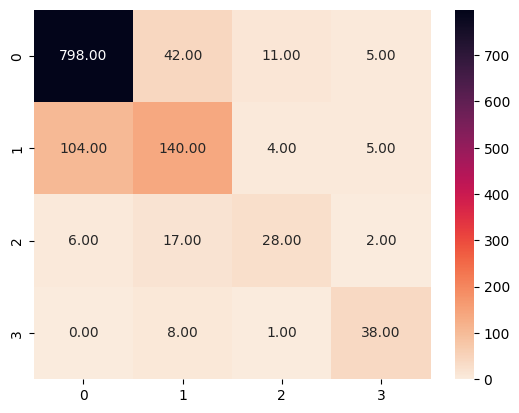

In [ ]:
sns.heatmap(confusion_matrix(y_train,grid_search_log.predict(X_train)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_train, grid_search_log.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       354
         1.0       0.75      0.60      0.66       131
         2.0       0.58      0.44      0.50        16
         3.0       0.75      0.83      0.79        18

    accuracy                           0.83       519
   macro avg       0.74      0.70      0.71       519
weighted avg       0.82      0.83      0.82       519



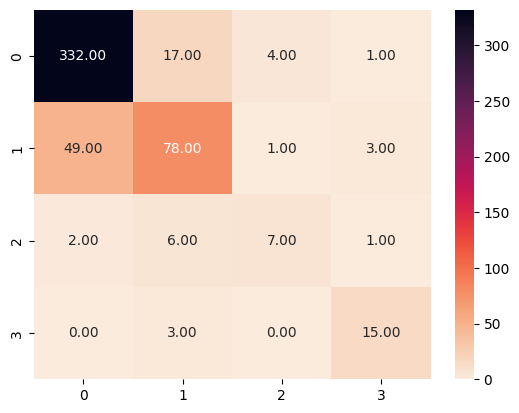

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search_log.predict(X_test)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_test, grid_search_log.predict(X_test)))

In [ ]:
model_KNN = KNeighborsClassifier()

knn_param_grid = {
    "n_neighbors": np.arange(30),
    "weights": ["uniform","distance"],
    "metric": ["euclidean","manhattan","minkowski"],
    "leaf_size": range(1,50,5)
}

grid_search_knn = GridSearchCV(estimator=model_KNN, param_grid=knn_param_grid, n_jobs=-1, cv=5, scoring="accuracy")

grid_search_knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 50, 5),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'leaf_size': 31, 'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
0.929704056788176


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       856
         1.0       1.00      1.00      1.00       253
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        47

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



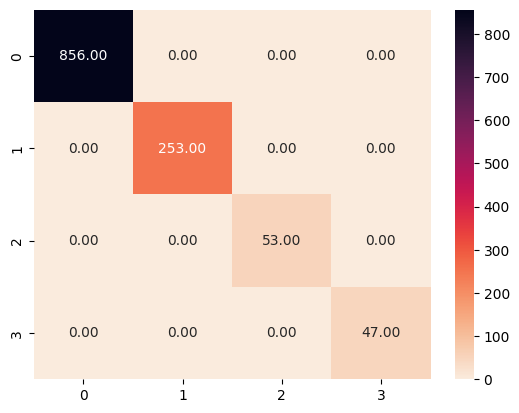

In [ ]:
sns.heatmap(confusion_matrix(y_train,grid_search_knn.predict(X_train)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_train, grid_search_knn.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       354
         1.0       0.94      0.86      0.90       131
         2.0       0.75      0.56      0.64        16
         3.0       1.00      0.89      0.94        18

    accuracy                           0.95       519
   macro avg       0.91      0.83      0.86       519
weighted avg       0.94      0.95      0.94       519



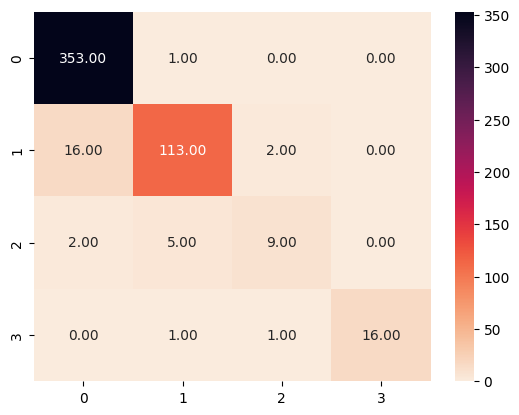

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search_knn.predict(X_test)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_test, grid_search_knn.predict(X_test)))

In [ ]:
svc = svm.SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid_search_svm = GridSearchCV(svc, parameters)

grid_search_svm.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.9760124824251569


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       856
         1.0       0.98      0.99      0.99       253
         2.0       1.00      1.00      1.00        53
         3.0       0.98      1.00      0.99        47

    accuracy                           0.99      1209
   macro avg       0.99      1.00      0.99      1209
weighted avg       0.99      0.99      0.99      1209



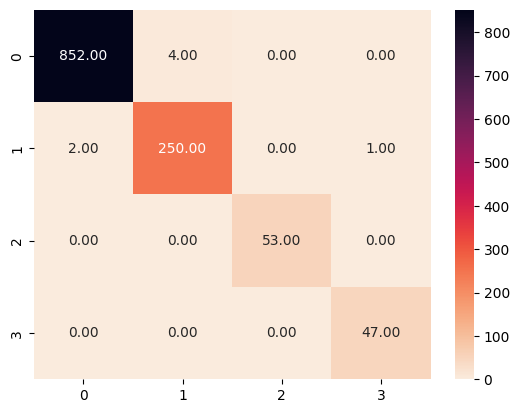

In [ ]:
sns.heatmap(confusion_matrix(y_train,grid_search_svm.predict(X_train)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_train, grid_search_svm.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       354
         1.0       0.99      0.98      0.98       131
         2.0       0.88      0.94      0.91        16
         3.0       1.00      0.94      0.97        18

    accuracy                           0.99       519
   macro avg       0.97      0.96      0.97       519
weighted avg       0.99      0.99      0.99       519



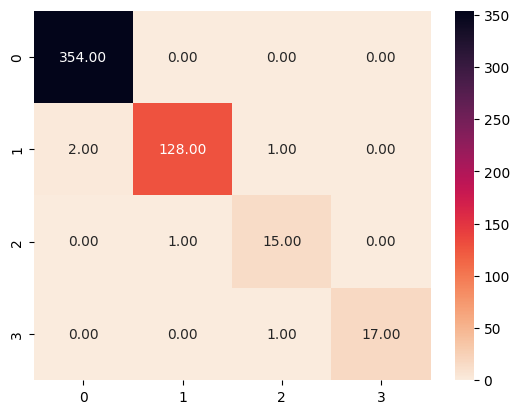

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search_svm.predict(X_test)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_test, grid_search_svm.predict(X_test)))

In [ ]:
model_tree = DecisionTreeClassifier()

param_grid_tree = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

grid_search_tree = GridSearchCV(model_tree,param_grid_tree)

grid_search_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 11}
0.9735331435821817


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       856
         1.0       1.00      1.00      1.00       253
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        47

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



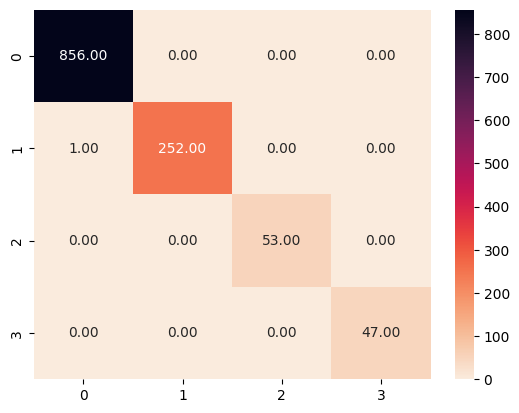

In [ ]:
sns.heatmap(confusion_matrix(y_train,grid_search_tree.predict(X_train)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_train, grid_search_tree.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       354
         1.0       0.98      0.96      0.97       131
         2.0       0.93      0.88      0.90        16
         3.0       0.95      1.00      0.97        18

    accuracy                           0.98       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



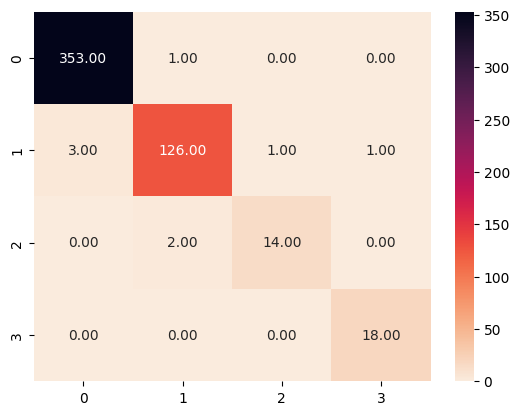

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search_tree.predict(X_test)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_test, grid_search_tree.predict(X_test)))

In [ ]:
neural_network = MLPClassifier()

param_grid_neural = {
    'hidden_layer_sizes': [(100,), (10,50,10), (20,), (100,100)],
    'activation': ['logistic', 'tanh','relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'learning_rate_init': [0.001,0.05]
}

grid_search_neural = GridSearchCV(neural_network,param_grid=param_grid_neural,cv=5,scoring='accuracy')

grid_search_neural.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (10, 50, 10), (20,),
                                                (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [ ]:
print(grid_search_neural.best_params_)
print(grid_search_neural.best_score_)

{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'solver': 'adam'}
0.9834470697164021


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       856
         1.0       0.99      0.98      0.99       253
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        47

    accuracy                           0.99      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       0.99      0.99      0.99      1209



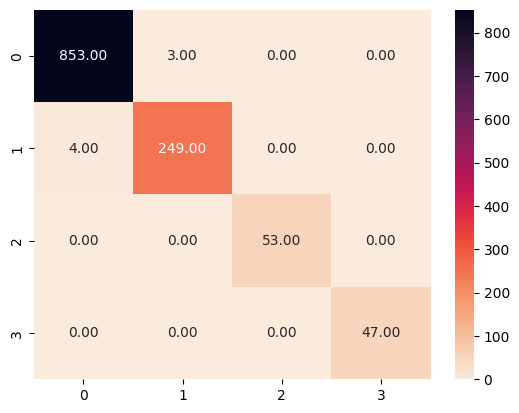

In [ ]:
sns.heatmap(confusion_matrix(y_train,grid_search_neural.predict(X_train)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_train, grid_search_neural.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       354
         1.0       0.98      0.92      0.95       131
         2.0       0.83      0.94      0.88        16
         3.0       1.00      0.94      0.97        18

    accuracy                           0.97       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.97      0.97      0.97       519



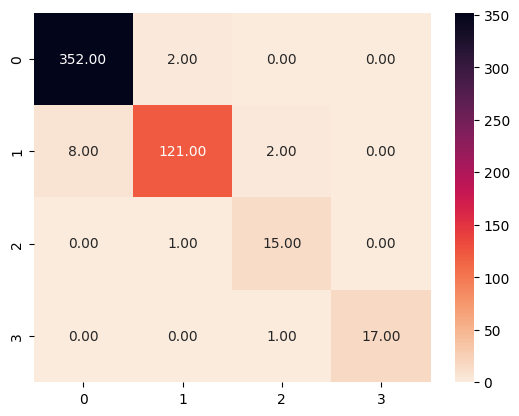

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search_neural.predict(X_test)),annot=True,fmt = ".2f",cmap='rocket_r')
print(classification_report(y_test, grid_search_neural.predict(X_test)))

Los modelos que tuvieron mejor desempeño en el classification report fueron SVM, decisionTree y NN, SVM y decisionTree obtuvieron los mejores accuracy en el classification report. El Arbol de decisión obtuvo un accuracy de 0.98 para los test data y 1 para los train data, mientras que SVM obtuvo 0.99 para ambos sets, SVM no solo tiene una precisión de casi el 100% sino que también su varianza es cero, mientras que el arbol de decisión a pesar de obtener 100% para los train data tiene una pequeña varianza del 2%, sin embargo en el grid search ambos tuvieron un accuracy menor que NN, esto significa que en el proceso de cross validation NN se desempeñó mejor que todos y por tanto obtuvo un mejor promedio de predicciones en todos los datos, por tanto, el modelo escogido final es NN ya que se mantuvo con una varianza baja en el proceso de cross validation.

## **Modelo escogido: Neural networks**